# Capstone Project: Predicting the need for hospital admittance using machine learning

By: Yash Nagpaul

*(Data Science Diploma Candidate, BrainStation)*

## Table of Contents:
1. <a href="#Introduction">Introduction</a>
2. <a href="#Part-1-—-EDA">Part 1 — EDA</a>
3. <a href="#Part-2-—-Data-Cleaning">Part 2 — Data Cleaning</a>
4. <a href="#Part-3-—-Modeling">Part 3 — Modeling</a>

---
### Introduction
The aim of this report is to predict whether or not a person needs to be admitted to the hospital. We have a dataset of over 560,000 unidentified patients. The dataset consists of 972 unqiue features.

---
### Part 1 — EDA

In [2]:
# import helper libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('./data/admit_data.csv')
# df = pd.read_csv('./df_less_columns.csv')
df.head()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,1,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


NOTES:
- There seems to be a duplicate index column
- We can do some low effort cleaning along the way during data exploration

In [10]:
# drop duplicate index column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# # work with a 10% sample
# df = df.groupby('disposition').sample(frac=0.1, random_state=42)
# df

# # reset index values since we're working with a random 10% sample
# df.reset_index(drop=True, inplace=True)
# df.head()

In [12]:
# Check for duplicate rows
df.duplicated().sum()

2

- Only 2 rows are duplicates, we can drop the duplicates with confidence because:
- it's an extremely small proprtion of the data, and
- we have over 900 features, which makes it very likely that the duplicate row is not intentional

In [13]:
df.drop_duplicates(inplace=True)

- From the source of the dataset, we know that there are many missing values.
- To prevent biased imputation, we will drop any columns where more than 10% of the values are missing


In [14]:
# keep track of how many columns have null values
# and how many columns we're dropping
columns_with_nulls = 0
dropped = 0
total_rows = 560484

for column in df.columns:
    dot_printer = '.' * (45 - len(df[column].name))
    
    if df[column].isna().sum() > 0:
        columns_with_nulls += 1
        how_many_nulls = df[column].isna().sum()
        null_percentage = round((df[column].isna().sum() / total_rows)*100,2)
        print(df[column].name, dot_printer, how_many_nulls, "--->", null_percentage,"%")
        
        # Drop the column if more than 10% of the values are missing
        if (df[column].isna().sum() / total_rows) > .10:
            df = df.drop(column, axis=1)
            dropped += 1
            
print('How many columns with missing values?', columns_with_nulls)
print('Dropped',dropped,'columns.')

esi .......................................... 2457 ---> 0.44 %
age .......................................... 11 ---> 0.0 %
race ......................................... 26 ---> 0.0 %
arrivalmode .................................. 21884 ---> 3.9 %
absolutelymphocytecount_last ................. 342558 ---> 61.12 %
acetonebld_last .............................. 560088 ---> 99.93 %
alanineaminotransferase(alt)_last ............ 434830 ---> 77.58 %
albumin_last ................................. 448950 ---> 80.1 %
alkphos_last ................................. 433753 ---> 77.39 %
anc(absneutrophilcount)_last ................. 340276 ---> 60.71 %
aniongap_last ................................ 348983 ---> 62.26 %
aspartateaminotransferase(ast)_last .......... 437525 ---> 78.06 %
b-typenatriureticpeptide,pro(probnp)_last .... 549575 ---> 98.05 %
baseexcess(poc)_last ......................... 519335 ---> 92.66 %
baseexcess,venous(poc)_last .................. 544750 ---> 97.19 %
basos_last ...

egfr(aframer)_min ............................ 519079 ---> 92.61 %
eos_min ...................................... 312974 ---> 55.84 %
eosinoabs_min ................................ 510561 ---> 91.09 %
epithelialcells_min .......................... 560453 ---> 99.99 %
globulin_min ................................. 387562 ---> 69.15 %
glucose_min .................................. 316230 ---> 56.42 %
glucose,meter_min ............................ 480816 ---> 85.79 %
hco3calculated,venous(poc)_min ............... 535446 ---> 95.53 %
hematocrit_min ............................... 311510 ---> 55.58 %
hemoglobin_min ............................... 311554 ---> 55.59 %
immaturegrans(abs)_min ....................... 511879 ---> 91.33 %
immaturegranulocytes_min ..................... 511865 ---> 91.33 %
inr_min ...................................... 422747 ---> 75.43 %
lactate,poc_min .............................. 453323 ---> 80.88 %
lipase_min ................................... 438742 ---> 78.

pocbun_max ................................... 441623 ---> 78.79 %
poccreatinine_max ............................ 441538 ---> 78.78 %
pocglucose_max ............................... 417324 ---> 74.46 %
pochematocrit_max ............................ 441425 ---> 78.76 %
pocionizedcalcium_max ........................ 441460 ---> 78.76 %
pocph_max .................................... 460785 ---> 82.21 %
pocpotassium_max ............................. 441541 ---> 78.78 %
pocsodium_max ................................ 441400 ---> 78.75 %
poctroponini._max ............................ 556059 ---> 99.21 %
potassium_max ................................ 318017 ---> 56.74 %
proteintotal_max ............................. 388551 ---> 69.32 %
prothrombintime_max .......................... 422810 ---> 75.44 %
ptt_max ...................................... 454339 ---> 81.06 %
rbc_max ...................................... 310675 ---> 55.43 %
rbc/hpf_max .................................. 471113 ---> 84.

o2_device_last ............................... 262426 ---> 46.82 %
pulse_min .................................... 212427 ---> 37.9 %
resp_min ..................................... 213269 ---> 38.05 %
spo2_min ..................................... 232897 ---> 41.55 %
temp_min ..................................... 214258 ---> 38.23 %
sbp_min ...................................... 212609 ---> 37.93 %
dbp_min ...................................... 212629 ---> 37.94 %
o2_device_min ................................ 218442 ---> 38.97 %
pulse_max .................................... 212427 ---> 37.9 %
resp_max ..................................... 213269 ---> 38.05 %
spo2_max ..................................... 232897 ---> 41.55 %
temp_max ..................................... 214258 ---> 38.23 %
sbp_max ...................................... 212609 ---> 37.93 %
dbp_max ...................................... 212629 ---> 37.94 %
o2_device_max ................................ 218442 ---> 38.97

cc_legswelling ............................... 2585 ---> 0.46 %
cc_lethargy .................................. 2585 ---> 0.46 %
cc_lossofconsciousness ....................... 2585 ---> 0.46 %
cc_maleguproblem ............................. 2585 ---> 0.46 %
cc_mass ...................................... 2585 ---> 0.46 %
cc_medicalproblem ............................ 2585 ---> 0.46 %
cc_medicalscreening .......................... 2585 ---> 0.46 %
cc_medicationproblem ......................... 2585 ---> 0.46 %
cc_medicationrefill .......................... 2585 ---> 0.46 %
cc_migraine .................................. 2585 ---> 0.46 %
cc_modifiedtrauma ............................ 2585 ---> 0.46 %
cc_motorcyclecrash ........................... 2585 ---> 0.46 %
cc_motorvehiclecrash ......................... 2585 ---> 0.46 %
cc_multiplefalls ............................. 2585 ---> 0.46 %
cc_nasalcongestion ........................... 2585 ---> 0.46 %
cc_nausea ..............................

##### NOTE: We will continue with EDA and return to dealing with the remaining nulls later

#### OBSERVATIONS:
- The dataset has a high level of sparsity (many missing values)
- We will need to think of a strategy to deal with this before we start making any predictions

In [15]:
# How many non-numeric columns do we have?

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(exclude=numerics).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560484 entries, 0 to 560485
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dep_name          560484 non-null  object
 1   gender            560484 non-null  object
 2   ethnicity         560484 non-null  object
 3   race              560458 non-null  object
 4   lang              560484 non-null  object
 5   religion          560484 non-null  object
 6   maritalstatus     560484 non-null  object
 7   employstatus      560484 non-null  object
 8   insurance_status  560484 non-null  object
 9   disposition       560484 non-null  object
 10  arrivalmode       538600 non-null  object
 11  arrivalmonth      560484 non-null  object
 12  arrivalday        560484 non-null  object
 13  arrivalhour_bin   560484 non-null  object
 14  previousdispo     560484 non-null  object
dtypes: object(15)
memory usage: 68.4+ MB


#### NOTES:
- A total of 15 non-numeric columns that either need to be converted to numeric somehow or dropped
---

### Part 2 — Data Cleaning
---
#### `disposition` column
- Convert the column values to binary
- `Admit` = 1
- `Discharge` = 0

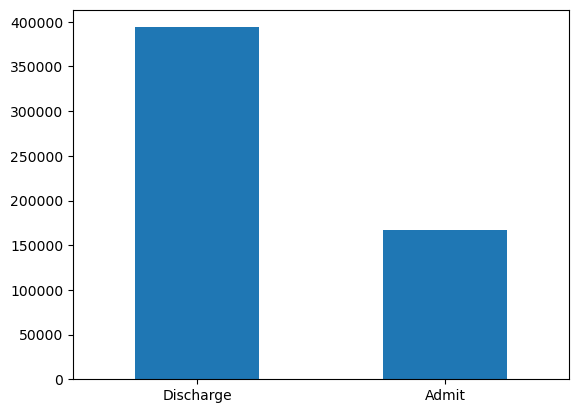

In [16]:
# first, visualize the distribution of classes in our target column

plt.figure()
df['disposition'].value_counts().plot(kind='bar', rot=0)
plt.show()

In [17]:
df['disposition'].value_counts(normalize=True)

Discharge    0.702689
Admit        0.297311
Name: disposition, dtype: float64

**Note**: Before splitting the dataset for model training, we will need to account for this imbalance between the classes in our target variable.

In [18]:
# Convert to binary
df['disposition'] = df['disposition'].apply(lambda x: 1 if x == 'Admit' else 0)

# Sanity check
df.tail()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
560481,A,2.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560482,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560483,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560484,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560485,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### NOTES:
- Doing this process many times will be tedious,
- For the remaining categorical columns, we will write a function that will convert all the categorical variables into dummy variables (one hot encoding)

In [19]:
# make sure none of those columns have an unusually large number of unique values

for column in df.select_dtypes(exclude=numerics).columns:
    print(df[column].value_counts(), '\n')

A    322281
B    166497
C     71706
Name: dep_name, dtype: int64 

Female    309652
Male      250832
Name: gender, dtype: int64 

Non-Hispanic          462721
Hispanic or Latino     93584
Unknown                 2812
Patient Refused         1367
Name: ethnicity, dtype: int64 

White or Caucasian                           299631
Black or African American                    157884
Other                                         89358
Asian                                          5790
Patient Refused                                5203
Unknown                                        1702
American Indian or Alaska Native                515
Native Hawaiian or Other Pacific Islander       375
Name: race, dtype: int64 

English    514814
Other       45670
Name: lang, dtype: int64 

Catholic             188979
None                 135196
Christian             75326
Baptist               40522
Other                 28954
Pentecostal           25586
Protestant            23346
Jewish              

In [20]:
df.select_dtypes(exclude=numerics).columns

Index(['dep_name', 'gender', 'ethnicity', 'race', 'lang', 'religion',
       'maritalstatus', 'employstatus', 'insurance_status', 'arrivalmode',
       'arrivalmonth', 'arrivalday', 'arrivalhour_bin', 'previousdispo'],
      dtype='object')

In [21]:
for column_name in df.select_dtypes(exclude=numerics).columns:
    
    # creates sparse matrix by default
    encoder = OneHotEncoder(dtype=int)
    
    # make a dataframe from the column
    column_df = pd.DataFrame(df[column_name])
    
    # fit the OneHotEncoder to the column_df and transform the df
    encoded_column = encoder.fit_transform(column_df)
    
    # sparse -> dense
    dense_array = encoded_column.toarray() 
    
    # make a dataframe from the ENCODED column
    encoded_df = pd.DataFrame(dense_array, columns=encoder.get_feature_names_out([column_name]))
    
    # join this encoded_df with the main df
    df = pd.concat([df, encoded_df], axis=1)
    
    # drop the original column from the main df
    df = df.drop(column_name, axis=1)

df.head()

,esi,age,disposition,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,...,previousdispo_Admit,previousdispo_Discharge,previousdispo_Eloped,previousdispo_LWBS after Triage,previousdispo_LWBS before Triage,previousdispo_No previous dispo,previousdispo_Observation,previousdispo_Send to L&D,previousdispo_Transfer to Another Facility,previousdispo_nan
0,4.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,4.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,3.0,84.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
print(f'Through one hot encoding the categorical variables, we have added {1070-972} new columns to our dataframe.')

Through one hot encoding the categorical variables, we have added 98 new columns to our dataframe.


#### Before going further, we can save this cleaned dataset in a new file

In [20]:
df_less_columns = df.to_csv('./df_less_columns1.csv')

- Now, before we  impute missing valuesm we will first split up the dataframe into 2 parts, a training set and a test set
- This is to avoid data leakage
- We will have to do this manually since the train_test_split function from SKLearn does not accept a dataframe with missing values
- So, I will shuffle the df and then do a 80:20 split

In [21]:
# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     df.drop('disposition', axis=1),
#     df['disposition'],
#     test_size=0.15,
#     stratify=df['disposition'],
#     random_state=42
# )

# Shuffle dataframe using sample function
df = df.sample(frac=1)

# Select ratio
ratio = 0.80
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
X_train = df[0:train_size]
X_test = df[train_size:]

y_train = X_train['disposition']
X_train = X_train.drop('disposition', axis=1)  

y_test = X_test['disposition']
X_test = X_test.drop('disposition', axis=1) 

# sanity check
print('Training data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Training data shape: (448385, 682)
Test data shape: (112097, 682)


-  Now that all of our data is numerical, and we have made the training and test DFs separate, we are ready to impute the missing values
- I will make sure that none of the values in the target variable are missing, and then pass everything into simple imputer one by one so that we get back cleaned vectors for all X's and y's (without column names and indices)

In [22]:
# sanity check

print(np.isnan(y_train).sum())
print(np.isnan(y_test).sum())

0
0


- We will use the **median** value of the columns with null values to impute the missing data.
- This is a reasonable approach since many of these columns store continuous data.
- This means that if we take another approach such as making dummy variables from the continious data, we will be depriving our models of the information that can be obtained from the ordinality in these continious variables.
- There are other approaches of imputation as well such as using KNNs or Random Forests, but these approaches also rely on finding patterns in the data to estimate missing values, hence they are unlikely to be accurate because of the sparsity of this dataset.

In [23]:
# Use SimpleImputer from SKLearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)

# fit and transform the training data
X_train = imputer.fit_transform(X_train)
# y_train = imputer.fit_transform(y_train)

# only transform the test data
X_test = imputer.transform(X_test)
# y_test = imputer.transform(y_test)

# sanity check
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

0
0


In [24]:
# Problem: our target variable is a Pandas series

y_train

237921    0.0
239290    1.0
153904    0.0
398074    1.0
322310    0.0
         ... 
179265    0.0
95893     0.0
233652    0.0
321726    0.0
314626    1.0
Name: disposition, Length: 448385, dtype: float64

In [25]:
# Solution: extract the value from the Series

y_train = y_train.values
y_test = y_test.values

y_train

array([0., 1., 0., ..., 0., 0., 1.])

**NOTES**:
- After imputing the missing values, I tried checking for multicollinearity by measuring the variance inflation factor.
- However, the large size of the dataset prevented the VIF to be calculated even after hours of waiting.
- We have managed to perform computations without reducing the size of the dataset so far, hence I am reluctant to use a small subsample at this stage as well.
- We will instead opt for other ways of accounting for multicollinearity such as running a lasso penalized regression, etc.

---
# Part 3 — Modeling

---
- Now that we have converted all our data into numerical values and verified that there are no missing values, we are ready to think about finding patterns and making predictions, i.e., modelling
- Before we start fitting any predictive models on our data, we should split the data that we have into 2 groups
- A large subset of the data can be used to train our models, and the remainder (i.e., the test set) can be used to see how the models perform on unseen data

In [26]:
# TODO: #1 This would only make sense after the NaN / missing values have been dealt with
# df.corr().unstack().sort_values()

In [27]:
# TODO: #2 XGBoost before imputing
# why does XGBoost not need imputed data?

---
#### Scaling:
Before fitting any models, we will scale our data so that any large variations arising due to different scales of measurement between any variables is normalized

In [28]:
# Scale the data after imputation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# only transform the test set
X_test_scaled = scaler.transform(X_test)

#### 3.1 Logistic Regression
- Let's begin with one of the simplest classification models: A Logistic Regression.
    - Briefly described, a logistic regression fits a logistic function on the input variables and outputs the probability of a binary target variable.
- First, we will run a simple Logistic Regression without worrying about any hyperparameter optimization.
- That way, we will quickly get a baseline model accuracy to work with and improve upon.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

train_acc = logreg.score(X_train_scaled, y_train)
test_acc = logreg.score(X_test_scaled, y_test)

print('Model accuracy with training data:', round(train_acc*100,2),"%")
print('Model accuracy with test data:', round(test_acc*100,2),"%")

/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy with training data: 79.48 %
Model accuracy with test data: 79.58 %


#### DISCUSSION:
- Our first model is ~85% accurate on unseen data!
- That's not bad at all since it's significantly better than what we would get if we simply guessed every disposition as '0' (since 70% of all dispositions in our dataset are '0').
- It is important to note that we dropped over 300 columns since they were missing more than 10% of the values.
- Yet, we are able to achieve an accuracy that is almost at par with the original study.
- Let's try to improve this result by optimizing the regression parameters

In [31]:
from sklearn.model_selection import GridSearchCV

# parameter grid for logistic regression
param_grid = {
    'C': np.logspace(-3, 7, 11),
    'penalty': [
        'l1', 'l2'
    ]
}

logreg = LogisticRegression(random_state=42)

# GridSearchCV allows us to search over multiple params in a model
my_logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

my_logreg_cv.fit(X_train_scaled, y_train)

# Best hyperparameters
my_logreg_cv.best_params_

/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

{'C': 0.1, 'penalty': 'l2'}

- Now, I am curious to see which are the top 10 most predictive variables that result in admitting the disposition (i.e., where disposition = 1)

In [32]:
logreg = LogisticRegression(penalty='l2',C=0.1, random_state=42)
logreg.fit(X_train, y_train)

train_acc = logreg.score(X_train_scaled, y_train)
test_acc = logreg.score(X_test_scaled, y_test)

print('Model accuracy with training data:', round(train_acc*100,2),"%")
print('Model accuracy with test data:', round(test_acc*100,2),"%")

/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy with training data: 78.84 %
Model accuracy with test data: 78.84 %


In [12]:
features_df = pd.read_csv('./df_less_columns.csv')
features_df = features_df.drop('disposition', axis=1)
features_df = features_df.drop(columns=['Unnamed: 0'])

feature_counts = pd.DataFrame(
    {
        "coefficients": logreg.coef_[0]
    },
    features_df.columns
).sort_values('coefficients', ascending=False)

feature_counts.head(10).plot(kind='bar', figsize=(15,5), legend=False)
plt.title("Top 10 features predictive of 'Admit'")
plt.ylabel('Coefficients')
plt.xticks(rotation=45)
plt.show()

#### OBSERVATIONS:
- The above chart shows us the top 10 predictors or whether or not an ER visit will result in admittance to the hospital.
- It's not surprising that age is the most significant predictor. The older a patient, the more likely they are to get admitted.

---
Inspite of removing over 300 columns, our dataset is taking quite long to do any modelling.

So, we will reduce the dimensionality of the dataset by using Principal Component Analysis (PCA)
- what pca does #TODO:

In [60]:
from sklearn.decomposition import PCA

# let's say we want to preserve 99
pca = PCA()
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [61]:
expl_var = pca.explained_variance_ratio_

cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.68865511, 0.89776062, 0.93053032, 0.94289774, 0.95252928,
       0.95584105, 0.95871844, 0.9612871 , 0.96341688, 0.96509512,
       0.96635382, 0.96751159, 0.96861667, 0.96966282, 0.97053584,
       0.97134402, 0.97212701, 0.97284067, 0.97353986, 0.97418757,
       0.97479066, 0.97535299, 0.97585866, 0.97635693, 0.97684982,
       0.97730069, 0.97774095, 0.97816926, 0.97859263, 0.9789982 ,
       0.97937908, 0.97973918, 0.980088  , 0.98043174, 0.98076614,
       0.98108756, 0.98138936, 0.98168413, 0.98196965, 0.98225195,
       0.98251852, 0.98277428, 0.98302289, 0.98326003, 0.98349396,
       0.98372509, 0.98395521, 0.98418367, 0.98441116, 0.98463292,
       0.98485209, 0.98506464, 0.98527383, 0.98547785, 0.98568064,
       0.98587624, 0.98606706, 0.98625186, 0.98642818, 0.98660239,
       0.9867713 , 0.98694004, 0.98710614, 0.98727073, 0.98743416,
       0.98759137, 0.98774629, 0.98789947, 0.98805108, 0.9882013 ,
       0.98834988, 0.98849661, 0.98863916, 0.98877895, 0.98891

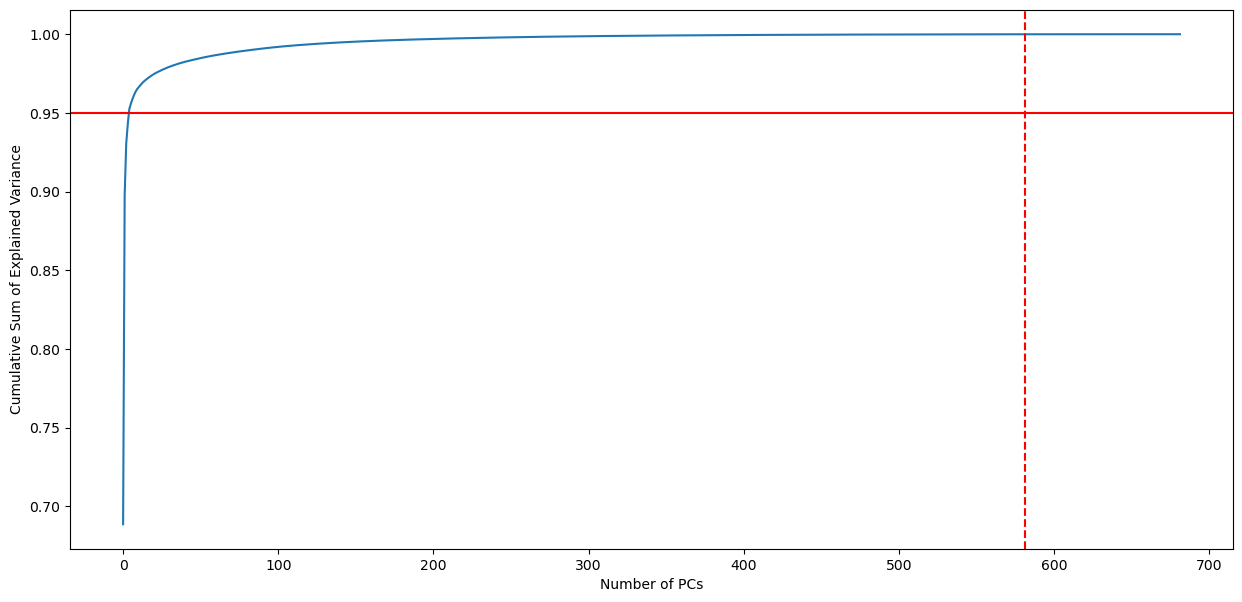

In [62]:
# Plot the cumulative sum graph

plt.figure(figsize=(15,7))
plt.plot(cumulative_sum)
plt.axhline(0.95, c='r')
plt.axvline(581, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.show()

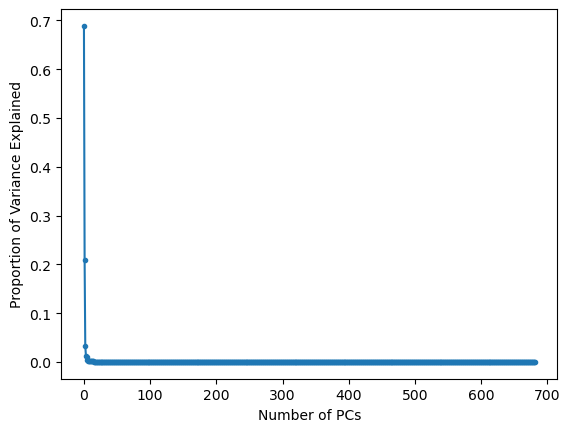

In [63]:
# no elbow

plt.figure()
plt.plot(expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks()
plt.show()

In [64]:
# %pip install xgboost
from xgboost import XGBClassifier

In [65]:
xgbc = XGBClassifier()
xgbc.fit(X_train_scaled, y_train)
y_pred = xgbc.predict(X_test_scaled)

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     78682
         1.0       0.83      0.69      0.76     33415

    accuracy                           0.87    112097
   macro avg       0.86      0.82      0.83    112097
weighted avg       0.86      0.87      0.86    112097

